In [1]:
import numpy as np
import pandas as pd
import lightgbm as lgb
import xgboost as xgb
import warnings
from xgboost import plot_importance
import time
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

warnings.filterwarnings('ignore')

In [2]:
train  = pd.read_csv('competition_data/train.csv')
test  = pd.read_csv('competition_data/test.csv')
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_columns', 100)

In [3]:
train

,index,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,country,introelapse,testelapse,surveyelapse,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16,education,urban,gender,engnat,age,hand,religion,orientation,voted,married,familysize,ASD,nerdiness
0,0,1.0,5.0,5.0,5.0,1.0,4.0,5.0,5.0,1.0,3.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,1.0,USA,3,553,6,4.0,3.0,5.0,1.0,3.0,5.0,5.0,3.0,5.0,3.0,1,1,0,1,1,0,0,0,0,1,0,0,0,1,1,1,2.0,1,3.0,1.0,20,2.0,12.0,4.0,2.0,1.0,4.0,2.0,1
1,1,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,3.0,3.0,1.0,4.0,5.0,3.0,1.0,2.0,4.0,5.0,1.0,3.0,1.0,1.0,5.0,3.0,2.0,5.0,USA,5,85,120,4.0,2.0,3.0,5.0,3.0,2.0,5.0,1.0,2.0,2.0,1,1,1,1,1,0,1,0,0,1,0,0,1,1,1,1,4.0,2,2.0,1.0,49,1.0,2.0,1.0,1.0,2.0,4.0,2.0,1
2,2,4.0,5.0,5.0,4.0,3.0,5.0,5.0,5.0,4.0,4.0,2.0,5.0,5.0,5.0,1.0,3.0,5.0,3.0,5.0,2.0,2.0,1.0,2.0,4.0,2.0,5.0,NLD,9,108,100,1.0,2.0,3.0,1.0,5.0,5.0,3.0,4.0,5.0,2.0,1,1,0,1,1,0,1,1,0,1,0,0,1,1,1,1,2.0,1,1.0,2.0,43,1.0,2.0,2.0,2.0,3.0,4.0,2.0,1
3,3,4.0,4.0,4.0,2.0,4.0,3.0,3.0,5.0,3.0,4.0,5.0,2.0,2.0,4.0,4.0,2.0,4.0,5.0,4.0,3.0,3.0,4.0,3.0,4.0,4.0,2.0,USA,2,121,139,3.0,3.0,3.0,4.0,5.0,3.0,4.0,4.0,3.0,3.0,1,1,0,1,1,0,0,0,0,1,0,0,1,1,1,1,1.0,3,1.0,1.0,17,2.0,1.0,1.0,2.0,1.0,2.0,2.0,1
4,4,4.0,4.0,4.0,4.0,3.0,3.0,4.0,2.0,3.0,4.0,4.0,4.0,3.0,5.0,5.0,2.0,4.0,1.0,4.0,2.0,4.0,2.0,3.0,4.0,4.0,4.0,ITA,3,640,216,3.0,3.0,4.0,4.0,4.0,4.0,3.0,4.0,3.0,2.0,1,1,0,1,1,0,0,1,0,1,0,0,0,1,0,1,1.0,2,2.0,2.0,18,2.0,12.0,1.0,2.0,1.0,1.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,2.0,5.0,4.0,3.0,3.0,4.0,4.0,4.0,3.0,4.0,1.0,4.0,4.0,3.0,4.0,4.0,2.0,5.0,2.0,4.0,1.0,2.0,5.0,4.0,2.0,4.0,USA,12,103,161,2.0,2.0,4.0,3.0,3.0,5.0,3.0,3.0,3.0,3.0,1,1,1,1,1,0,0,0,0,1,0,1,1,1,1,1,2.0,2,2.0,1.0,17,1.0,1.0,3.0,2.0,1.0,3.0,2.0,0
14996,14996,5.0,4.0,5.0,4.0,4.0,5.0,5.0,4.0,4.0,5.0,1.0,4.0,4.0,4.0,2.0,5.0,5.0,4.0,1.0,5.0,3.0,4.0,4.0,5.0,4.0,5.0,USA,31,106,179,3.0,2.0,4.0,5.0,4.0,3.0,4.0,1.0,2.0,2.0,1,1,0,1,1,0,0,0,0,1,0,0,0,1,1,1,4.0,1,2.0,2.0,45,1.0,3.0,1.0,1.0,2.0,3.0,2.0,1
14997,14997,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,2.0,5.0,5.0,3.0,4.0,USA,17,103,168,1.0,3.0,2.0,5.0,1.0,5.0,3.0,3.0,1.0,1.0,1,1,0,1,1,0,0,0,0,1,0,0,1,1,1,1,2.0,2,2.0,1.0,20,1.0,1.0,2.0,1.0,1.0,3.0,1.0,1
14998,14998,5.0,5.0,4.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,3.0,5.0,4.0,4.0,1.0,5.0,4.0,5.0,5.0,2.0,5.0,3.0,5.0,3.0,3.0,5.0,USA,14,68,109,1.0,1.0,3.0,5.0,4.0,5.0,5.0,4.0,2.0,1.0,1,1,1,1,1,0,0,1,0,1,0,1,1,1,1,1,3.0,2,2.0,1.0,29,1.0,12.0,4.0,2.0,2.0,2.0,1.0,0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 70 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         15000 non-null  int64  
 1   Q1            14959 non-null  float64
 2   Q2            14931 non-null  float64
 3   Q3            14950 non-null  float64
 4   Q4            14929 non-null  float64
 5   Q5            14962 non-null  float64
 6   Q6            14952 non-null  float64
 7   Q7            14924 non-null  float64
 8   Q8            14952 non-null  float64
 9   Q9            14944 non-null  float64
 10  Q10           14928 non-null  float64
 11  Q11           14941 non-null  float64
 12  Q12           14933 non-null  float64
 13  Q13           14960 non-null  float64
 14  Q14           14964 non-null  float64
 15  Q15           14955 non-null  float64
 16  Q16           14967 non-null  float64
 17  Q17           14963 non-null  float64
 18  Q18           14937 non-nu

In [5]:
train = train.drop(['index', 'country'],axis = 1)
test =test.drop(['index', 'country'],axis = 1)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 68 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Q1            14959 non-null  float64
 1   Q2            14931 non-null  float64
 2   Q3            14950 non-null  float64
 3   Q4            14929 non-null  float64
 4   Q5            14962 non-null  float64
 5   Q6            14952 non-null  float64
 6   Q7            14924 non-null  float64
 7   Q8            14952 non-null  float64
 8   Q9            14944 non-null  float64
 9   Q10           14928 non-null  float64
 10  Q11           14941 non-null  float64
 11  Q12           14933 non-null  float64
 12  Q13           14960 non-null  float64
 13  Q14           14964 non-null  float64
 14  Q15           14955 non-null  float64
 15  Q16           14967 non-null  float64
 16  Q17           14963 non-null  float64
 17  Q18           14937 non-null  float64
 18  Q19           14947 non-nu

In [7]:
train.isna().sum()

Q1               41
Q2               69
Q3               50
Q4               71
Q5               38
Q6               48
Q7               76
Q8               48
Q9               56
Q10              72
Q11              59
Q12              67
Q13              40
Q14              36
Q15              45
Q16              33
Q17              37
Q18              63
Q19              53
Q20              45
Q21              39
Q22              38
Q23              50
Q24              61
Q25              44
Q26              68
introelapse       0
testelapse        0
surveyelapse      0
TIPI1            53
TIPI2            66
TIPI3            79
TIPI4            64
TIPI5            70
TIPI6            62
TIPI7            64
TIPI8            65
TIPI9            64
TIPI10           80
VCL1              0
VCL2              0
VCL3              0
VCL4              0
VCL5              0
VCL6              0
VCL7              0
VCL8              0
VCL9              0
VCL10             0
VCL11             0


In [8]:
train_x = train.drop(['nerdiness'],axis=1)
train_y = train['nerdiness']

In [9]:
start_time=time.time()
xgb= xgb.XGBClassifier(
            n_estimators=1000,
        )
xgb.fit(X=train_x,y=train_y)
end_time=time.time()
print('소요 시간 : ')
print(end_time-start_time)

[17:51:34] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
소요 시간 : 
15.278595685958862


In [10]:
# 재학습 위한 공간
xgb

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=1000, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [11]:
#lgbm_clf.fit(train_x, train_y)
lgbm_pred = xgb.predict(test)

In [12]:
submission = pd.read_csv('competition_data/sample_submission.csv')

submission

,index,nerdiness
0,0,-1
1,1,-1
2,2,-1
3,3,-1
4,4,-1
...,...,...
35447,35447,-1
35448,35448,-1
35449,35449,-1
35450,35450,-1


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

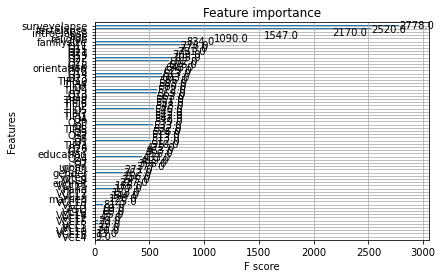

In [13]:
plot_importance(xgb,)

In [14]:
submission["nerdiness"] = lgbm_pred

In [15]:
submission

,index,nerdiness
0,0,0
1,1,1
2,2,1
3,3,1
4,4,1
...,...,...
35447,35447,1
35448,35448,1
35449,35449,1
35450,35450,0


In [16]:
submission.to_csv("baseline_withNA-XGB.csv", index = False)